# Exploratory Data Analysis of Real-Estate Sales in NYC

In [1]:
# Importing essential libraries

import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing and combining files

In [2]:
path = r'/Users/shouryagupta/Documents/Business Analysis/final project/All csv files'
all_files = glob.glob(path + "/*.xls")

li = []

for filename in all_files:
    df = pd.read_excel(filename,header=0,skiprows=4)
    li.append(df)
    
df2 = pd.concat(li,axis=0,ignore_index=True)

#Stripping unnecessary characters from column names

df2.columns = [col.strip() for col in df2.columns]
df2.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,13,,A5,4716 AMBOY ROAD,,...,1,0,1,1871,1110,2002,1,A5,370000,2014-12-08
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,65,,A3,22 BLUE HERON DRIVE,,...,1,0,1,8000,3800,1987,1,A3,0,2014-07-17


## Data Manipulation and Cleansing

In [41]:
# Checking the rows and columns count for combined file

df2.shape

(270107, 21)

In [45]:
# checking the data types of all columns

df2.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int64
SALE DATE           

In [3]:
# Setting Borough as the index

df2.set_index('BOROUGH',inplace=True)
df2.head(2)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
BOROUGH,,,,,,,,,,,,,,,,,,,,
5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,13,,A5,4716 AMBOY ROAD,,10312,1,0,1,1871,1110,2002,1,A5,370000,2014-12-08
5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,65,,A3,22 BLUE HERON DRIVE,,10312,1,0,1,8000,3800,1987,1,A3,0,2014-07-17


In [4]:
# Dropping unnecessary columns

df2.drop(columns=['BLOCK','LOT','EASE-MENT','ADDRESS','APARTMENT NUMBER','ZIP CODE'],inplace=True)
df2.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
BOROUGH,,,,,,,,,,,,,,
5,ANNADALE,01 ONE FAMILY DWELLINGS,1,A5,1,0,1,1871,1110,2002,1,A5,370000,2014-12-08
5,ANNADALE,01 ONE FAMILY DWELLINGS,1,A3,1,0,1,8000,3800,1987,1,A3,0,2014-07-17
5,ANNADALE,01 ONE FAMILY DWELLINGS,1,A2,1,0,1,4750,2002,1960,1,A2,0,2014-05-30
5,ANNADALE,01 ONE FAMILY DWELLINGS,1,A1,1,0,1,9900,1768,1940,1,A1,740000,2014-07-29
5,ANNADALE,01 ONE FAMILY DWELLINGS,1,A1,1,0,1,10000,2600,1920,1,A1,0,2014-06-17


In [5]:
# Sorting the dataframe

df2.sort_values('BOROUGH',ascending=True,inplace=True)
df2.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
BOROUGH,,,,,,,,,,,,,,
1,WASHINGTON HEIGHTS UPPER,44 CONDO PARKING,4,RG,0,0,1,0,0,2003,4,RG,0,2014-10-03
1,MURRAY HILL,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0,1,0,0,1917,2,R4,2362340,2014-11-20
1,MURRAY HILL,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0,1,0,0,1917,2,R4,5075976,2014-10-27
1,MURRAY HILL,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0,1,0,0,1917,2,R4,3462050,2014-12-01
1,MURRAY HILL,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0,1,0,0,1917,2,R4,1471371,2014-10-31


In [61]:
# Checking null values

df.isnull()

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24519,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24520,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24521,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24522,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# filtering records having Sale price >1000

df2 = df2.loc[df2['SALE PRICE'] > 1000]

In [7]:
# filtering and dropping irrelevant records

df2 = df2.loc[df2['GROSS SQUARE FEET'] > 0]
df2 = df2.loc[df2['LAND SQUARE FEET'] > 0]
df2 = df2.loc[df2['TOTAL UNITS'] > 0]
df2 = df2.drop(df2[(df2['COMMERCIAL UNITS'] == 0) & (df2['RESIDENTIAL UNITS'] == 0)].index)
df2 = df2.loc[df2['YEAR BUILT'] > 0]


In [11]:
# Checking shape of the resultant dataset

df2.shape

(86399, 14)

In [12]:
# Checking headers of the resultant dataset

df2.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
BOROUGH,,,,,,,,,,,,,,
1,MURRAY HILL,14 RENTALS - 4-10 UNIT,2B,S9,6,3,9,1975,7035,1910,2,S9,5300000,2014-06-20
1,MURRAY HILL,14 RENTALS - 4-10 UNIT,2A,S3,3,1,4,1840,5244,1910,2,S3,4550000,2014-10-28
1,MURRAY HILL,14 RENTALS - 4-10 UNIT,2A,S5,5,1,6,2074,4640,1915,2,S5,5100000,2014-01-30
1,MURRAY HILL,14 RENTALS - 4-10 UNIT,2A,S3,3,1,4,1469,3604,1910,2,S3,26500000,2014-10-07
1,MURRAY HILL,14 RENTALS - 4-10 UNIT,2A,S4,4,1,5,2000,7878,1920,2,S4,10000000,2014-12-16


In [8]:
# Creating function to add Product column based on conditions

def conditions(df2):
    if (df2['COMMERCIAL UNITS'] == 0) & (df2['RESIDENTIAL UNITS'] > 0):
        return 'Residential'
        
    elif (df2['COMMERCIAL UNITS'] > 0) & (df2['RESIDENTIAL UNITS'] == 0):
        return 'Commercial'
    
    else:
        return 'Mixed'

In [9]:
# Creating Product column using condition function

df2['Product'] = df2.apply(conditions, axis = 1)
df2.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Product
BOROUGH,,,,,,,,,,,,,,,
1,MURRAY HILL,14 RENTALS - 4-10 UNIT,2B,S9,6,3,9,1975,7035,1910,2,S9,5300000,2014-06-20,Mixed
1,MURRAY HILL,14 RENTALS - 4-10 UNIT,2A,S3,3,1,4,1840,5244,1910,2,S3,4550000,2014-10-28,Mixed
1,MURRAY HILL,14 RENTALS - 4-10 UNIT,2A,S5,5,1,6,2074,4640,1915,2,S5,5100000,2014-01-30,Mixed
1,MURRAY HILL,14 RENTALS - 4-10 UNIT,2A,S3,3,1,4,1469,3604,1910,2,S3,26500000,2014-10-07,Mixed
1,MURRAY HILL,14 RENTALS - 4-10 UNIT,2A,S4,4,1,5,2000,7878,1920,2,S4,10000000,2014-12-16,Mixed


In [78]:
# Checking value counts of Prodcut column

df2['Product'].value_counts()

Residential    73629
Commercial      7105
Mixed           5665
Name: Product, dtype: int64

In [81]:
# Exporting the cleansed data file

df2.to_csv('NYC Property_Prices(2013-2015).csv')

## Pareto Chart Creation

In [17]:
#total Sales price by building class category
Sales_Building_Class = df2[['BUILDING CLASS CATEGORY', 'SALE PRICE']]
Sales_Building_Class = (df2.groupby('BUILDING CLASS CATEGORY').agg(Total_Sales_Price=('SALE PRICE','sum')))
Sales_Building_Class = Sales_Building_Class.sort_values('Total_Sales_Price',ascending=False)

#Sales_Building_Class
Sales_Building_Class_Table = pd.DataFrame(Sales_Building_Class.to_records())
Sales_Building_Class_Table.columns = [hdr.replace("('sum', '", "").replace(")", "") \
for hdr in Sales_Building_Class_Table.columns]
Sales_Building_Class_Table["cum_percentage"] = round(Sales_Building_Class_Table["Total_Sales_Price"].cumsum()/Sales_Building_Class_Table["Total_Sales_Price"].sum()*100,2)
Sales_Building_Class_Table['BUILDING CLASS CATEGORY CODE'] = Sales_Building_Class_Table['BUILDING CLASS CATEGORY'].str[:2]
Sales_Building_Class_Table.head()



,BUILDING CLASS CATEGORY,Total_Sales_Price,cum_percentage,BUILDING CLASS CATEGORY CODE
0,21 OFFICE BUILDINGS,31841028164,19.21,21
1,08 RENTALS - ELEVATOR APARTMENTS,30150639395,37.40,08
2,07 RENTALS - WALKUP APARTMENTS,20941587921,50.03,07
3,01 ONE FAMILY DWELLINGS,19948683842,62.07,01
4,02 TWO FAMILY DWELLINGS,18700647994,73.35,02


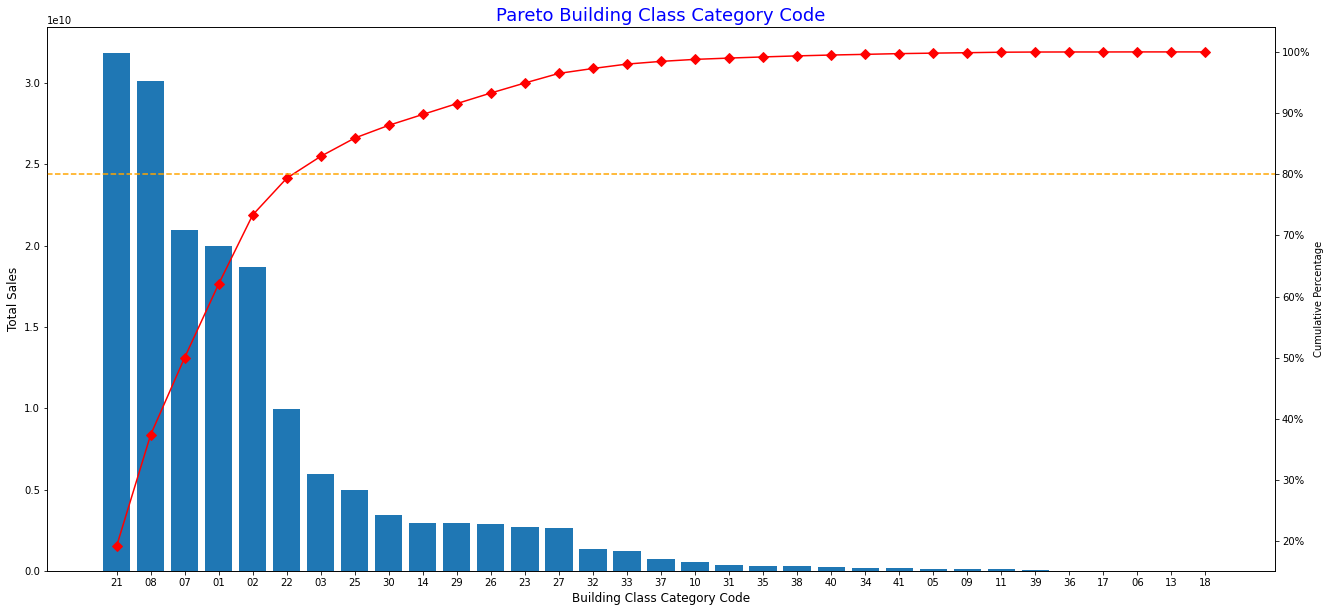

In [18]:
# Set figure and axis
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(22,10))



# Plot bars (i.e. frequencies)
ax.bar(Sales_Building_Class_Table["BUILDING CLASS CATEGORY CODE"], Sales_Building_Class_Table["Total_Sales_Price"])
ax.set_title("Pareto Building Class Category Code", fontsize=18, color="b")
ax.set_xlabel("Building Class Category Code", fontsize=12, color="black")
ax.set_ylabel("Total Sales", fontsize=12, color="black");



# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(Sales_Building_Class_Table.index, Sales_Building_Class_Table["cum_percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");


As per pareto chart, below building categories represents 80% of the total sales:-

1. OFFICE BUILDINGS (21)
2. RENTALS - ELEVATOR APARTMENTS (08)
3. RENTALS - WALKUP APARTMENTS (07)
4. ONE FAMILY DWELLINGS (01)
5. TWO FAMILY DWELLINGS (02)
6. STORE BUILDINGS (22)

In [19]:
#total GROSS SQUARE FEET (GSF) by building class category

GSF_Building_Class = df2[['BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET']]
GSF_Building_Class = (df2.groupby('BUILDING CLASS CATEGORY').agg(Total_GSF=('GROSS SQUARE FEET','sum')))
GSF_Building_Class = GSF_Building_Class.sort_values('Total_GSF',ascending=False)
GSF_Building_Class_Table = pd.DataFrame(GSF_Building_Class.to_records())
GSF_Building_Class_Table.columns = [hdr.replace("('sum', '", "").replace(")", "") \
for hdr in GSF_Building_Class_Table.columns]
GSF_Building_Class_Table["cum_percentage"] = round(GSF_Building_Class_Table["Total_GSF"].cumsum()/GSF_Building_Class_Table["Total_GSF"].sum()*100,2)
GSF_Building_Class_Table['BUILDING CLASS CATEGORY CODE'] = GSF_Building_Class_Table['BUILDING CLASS CATEGORY'].str[:2]
GSF_Building_Class_Table.head()


,BUILDING CLASS CATEGORY,Total_GSF,cum_percentage,BUILDING CLASS CATEGORY CODE
0,25 LUXURY HOTELS,206088052,27.34,25
1,26 OTHER HOTELS,103627849,41.09,26
2,08 RENTALS - ELEVATOR APARTMENTS,91318185,53.21,08
3,07 RENTALS - WALKUP APARTMENTS,66776221,62.07,07
4,02 TWO FAMILY DWELLINGS,64431729,70.62,02


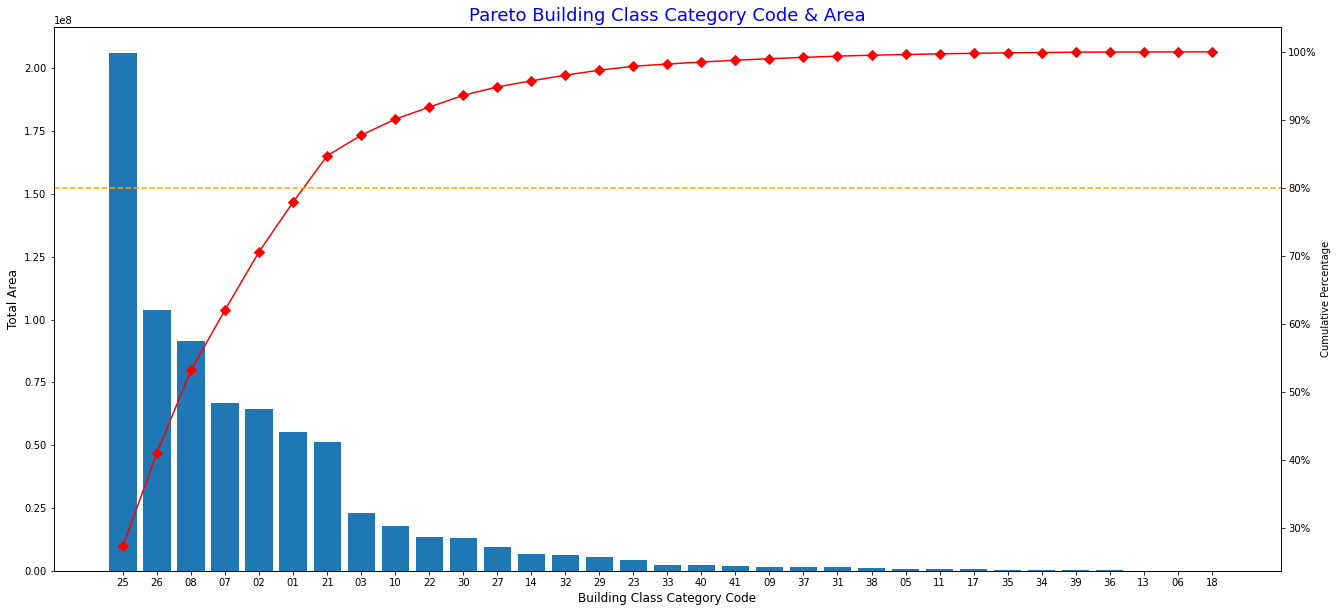

In [20]:
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))



# Plot bars (i.e. frequencies)
ax.bar(GSF_Building_Class_Table["BUILDING CLASS CATEGORY CODE"], GSF_Building_Class_Table["Total_GSF"])
ax.set_title("Pareto Building Class Category Code & Area", fontsize=18, color="b")
ax.set_xlabel("Building Class Category Code", fontsize=12, color="black")
ax.set_ylabel("Total Area", fontsize=12, color="black");



# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(GSF_Building_Class_Table.index,GSF_Building_Class_Table["cum_percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

As per pareto chart, below building categories represents 80% of the total Area:-

LUXURY HOTELS (25)
OTHER HOTELS (26)
RENTALS - ELEVATOR APARTMENTS (08)
RENTALS - WALKUP APARTMENTS (07)
TWO FAMILY DWELLINGS (02)
ONE FAMILY DWELLINGS (01)

## Heatmap Creation

In [21]:
correlation_dataset = df2[["RESIDENTIAL UNITS","COMMERCIAL UNITS","LAND SQUARE FEET","GROSS SQUARE FEET","SALE PRICE"]]
correlation_dataset.head()


,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,
1,6,3,1975,7035,5300000
1,3,1,1840,5244,4550000
1,5,1,2074,4640,5100000
1,3,1,1469,3604,26500000
1,4,1,2000,7878,10000000


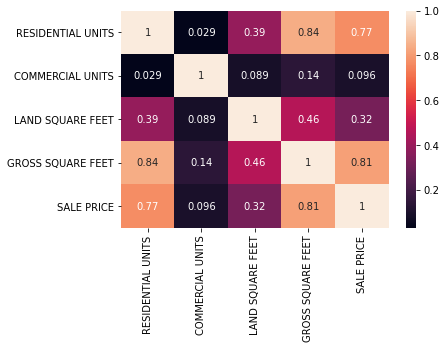

In [22]:
sns.heatmap(correlation_dataset.corr(), annot = True)
plt.show()